STUDENT PERFORMANCE- LINEAR REGRESSION 

WE WILL RUN A LINEAR REGRESSION TO STUDY THE RELATIONSHIP BETWEEN HOURS STUDIED WITH THE SCORE OBTAINED. THIS REGRESSION ONLY INVOLVES TWO VARIABLES AND HENCE IS A SIMPLE REGRESSION.

In [14]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  


In [7]:
!pip install openpyxl

#this library allows to read and write the excel 2010 xlsx/.xls files (I have converted the csv file to excel file)

                                              0.0/250.0 kB ? eta -:--:--
     -                                        10.2/250.0 kB ? eta -:--:--
     ------                                41.0/250.0 kB 487.6 kB/s eta 0:00:01
     -------------------------------------  245.8/250.0 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.7 MB/s eta 0:00:00


In [10]:
#importing excel file containing the dataset about student's performance
dataset=pd.read_excel("Book1.xlsx",sheet_name="Sheet1")


In [11]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
dataset.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [128]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [130]:
dataset.count()

Hours     25
Scores    25
dtype: int64

In [127]:
dataset.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


NOW WE'LL PLOT THIS DATA ON A 2-D GRPAH TO SEE IF THERE IS A RELATIONSHIP BETWEEN THE TWO VARIABLES.

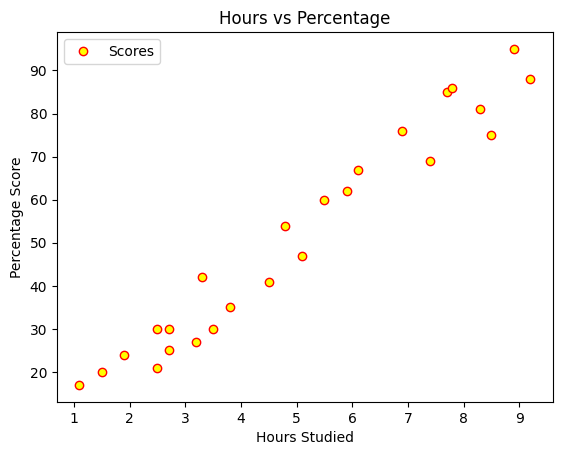

In [20]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='o', mec="red", mfc="yellow")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

THE GRPAH CLEARLY SHOWS A POSITIVE RELATIONSHIP BETWEEN THE HOURS STUDIED AND PERCENTAGE SCORED BY THE STUDENT AS WITH INCREASE IN HOURS SPENT ON STUDYING, THE PERCENTAGE SCORE HAS ALSO INCREASED. 

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [83]:
x=dataset['Hours']
y=dataset['Scores']

In [27]:
x

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [28]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

NOW we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [32]:
!pip install scikit-learn

In [95]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [96]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [103]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
model_train=regressor.fit(X_train, y_train) 



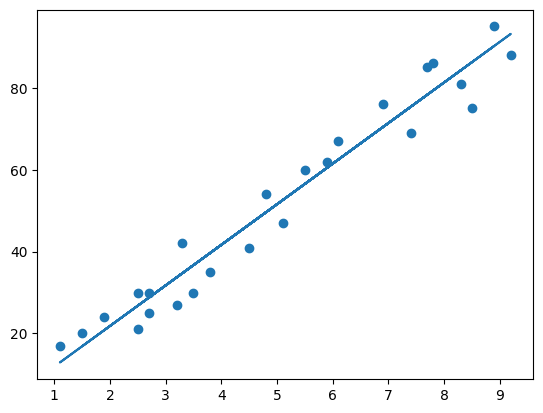

In [98]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [113]:
model_predict=regressor.predict(X_test)

In [114]:
model_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [115]:
prediction = model_train.predict([[9.25]])

In [116]:
prediction

array([93.69173249])

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [135]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, model_predict)) 

Mean Absolute Error: 4.183859899002975


MODEL DEPLOYMENT

In [118]:
from joblib import dump,load

In [120]:
dump(regressor,'student_performance.joblib')

['student_performance.joblib']

In [121]:
loaded_model = load('student_performance.joblib')

In [124]:
loaded_model.coef_

array([9.91065648])

In [122]:
Hours_studied = [[9.25]]

In [123]:
loaded_model.predict(Hours_studied)

array([93.69173249])